# CREDIT CARD DEFAULT PREDICTION

## Rohit Dhawale

## Problem Statment : 

Credit card defaults pose significant challenges and risks to lending institutions, leading to financial losses, increased non-performing assets, and potential damage to their reputation. In light of these challenges, there is a pressing need to develop innovative strategies to effectively reduce credit card defaults and minimize financial losses for lending institutions.

Objectives:

To avoid the same in the future, 'Rohit' has been engaged to assist in developing a model that identifies patterns and early warning signs of potential credit card defaults. This model aims to minimize financial losses incurred by lending institutions, enhance the stability of the credit card industry, protect credit card users' financial health and credit scores, reduce legal and administrative expenses linked to defaulted payments, safeguard the reputation and trust of lending institutions, and prevent fraudulent activities associated with credit card defaults.

## Install and/or import necessary packages

Installation of the necessary packages and setting random seed.

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

 ## Load the dataset

Loading the file with read_csv command and printing the top 5 values

In [3]:
# Load your dataset (replace 'data.csv' with your actual dataset file)
df = pd.read_csv("./data/default-of-credit-card-clients-preprocessed.csv",index_col=False)

In [4]:
df.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,...,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Default_payment
0,1,1,20000,2,2,1,24,2,2,-1,...,3913,3102,689,0,689,0,0,0,0,1
1,2,2,120000,2,2,2,26,-1,2,0,...,2682,1725,2682,0,1000,1000,1000,0,2000,1
2,3,3,90000,2,2,2,34,0,0,0,...,29239,14027,13559,1518,1500,1000,1000,1000,5000,0
3,4,4,50000,2,2,1,37,0,0,0,...,46990,48233,49291,2000,2019,1200,1100,1069,1000,0
4,5,5,50000,1,2,1,57,-1,0,-1,...,8617,5670,35835,2000,36681,10000,9000,689,679,0


## Explore and Clean the dataset

Exploring the columns and Drop the unnecessary columns

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Default_payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,3913,3102,689,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,1725,2682,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,29239,14027,13559,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,46990,48233,49291,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,8617,5670,35835,2000,36681,10000,9000,689,679,0


## Predictors and Target variables Split

In [7]:
## independent and dependent features
X=df.iloc[:,:-1] ##independent features
y=df.iloc[:,-1] ##dependent feature

In [8]:
X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,-2,3913,3102,689,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2,2682,1725,2682,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,0,29239,14027,13559,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,0,46990,48233,49291,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,0,8617,5670,35835,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,0,188948,192815,208365,8500,20000,5003,3047,5000,1000
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,1683,1828,3502,1837,3526,8998,129,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,0,3565,3356,2758,0,0,22000,4200,2000,3100
29998,29999,80000,1,3,1,41,1,-1,0,0,...,-1,-1645,78379,76304,85900,3409,1178,1926,52964,1804


In [9]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default_payment, Length: 30000, dtype: int64

In [11]:
y.value_counts()

0    23364
1     6636
Name: Default_payment, dtype: int64

We can see that the target variable is imbalanced. We will be doing oversampling to increase the size of minority class. This will result in better model fitting and and training. Here we will be using SMOTE for oversampling the data and balancing the dataset.

# SMOTE

Using Synthetic Minority Over-sampling Technique (SMOTE) to oversample the dataset. SMOTE is a method commonly used to address class imbalance in a classification problem. 

In [12]:
oversample=SMOTE()

In [13]:
X,y=oversample.fit_resample(X,y)

In [14]:
X.shape

(46728, 21)

In [15]:
y.value_counts()

1    23364
0    23364
Name: Default_payment, dtype: int64

Converting the target column to dataframe to visualize the balanced dataset.

In [24]:
df = pd.DataFrame(y, columns =['Default_payment']) 

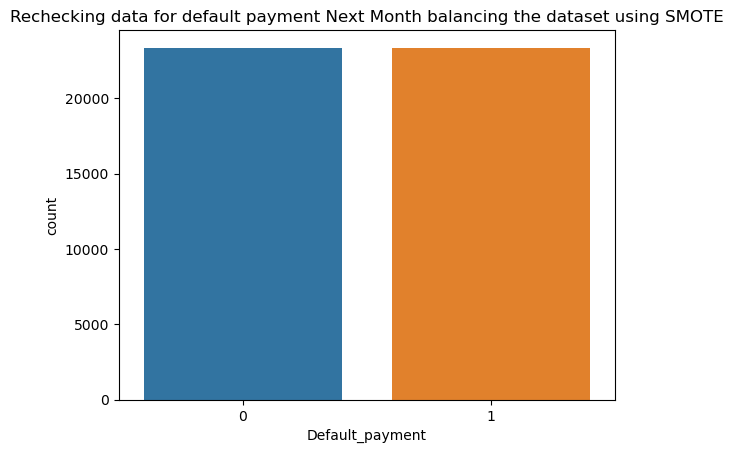

In [25]:
plt.title('Rechecking data for default payment Next Month balancing the dataset using SMOTE')
ax1 = sns.countplot(x= 'Default_payment', data = df)

plt.show()

## Partitioning data into training and test data sets

We've decided to utilize a training/test split of the data at 70% training and 30% testing. This percentage split ratio is inline with common practice for small to medium sized datasets, which this data represents. Moreover, we have decided not to do a three way data split, we wish to allocate as much data as possible to training and validation steps.

In [22]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In this section, we will prepare the dataset for model training. Specifically, we will standardize and apply MinMax scaling to our features. This is commonly done to ensure that our data is on a consistent scale and can improve the performance of certain machine learning algorithms.

### Standard Scaling

We start by applying Standard Scaling (z-score scaling) to our data. This process transforms the data such that it has a mean of 0 and a standard deviation of 1. It is particularly useful when dealing with features that have different scales or units.

### Min-Max Scaling
Next, we will test Min-Max scaling. Min-Max scaling transforms the data into a specific range (typically between 0 and 1), which can be beneficial for algorithms like k-nearest neighbors (KNN) that perform better when features are on a similar scale.

In [22]:
# Standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Test MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = mm.fit_transform(X_train)
X_test_mm_scaled = mm.transform(X_test)

### Compares accuracy for scaled and unscaled data for different models 

In [26]:
# Program to run multiple models through sklearn
# Default settings output accuracy and classification report
# Compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    models = [
        ('Default Logistic Regression', LogisticRegression()),
        ('Logistic Regression (Lasso)', LogisticRegression(penalty='l1', solver='liblinear')),
        ('Logistic Regression (Ridge)', LogisticRegression(penalty='l2', solver='liblinear')),
        ('Logistic Regression (Elastic Net)', LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')),
        ('Decision Tree', DecisionTreeClassifier()),        
        ('Naive Bayes', GaussianNB()),
        ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
        ('Random Forest', RandomForestClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('XGBoost', XGBClassifier()),
        ('SVM', SVC()),
        ('MLP Classifier', MLPClassifier())
    ]

    for name, model in models:
        # Unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)

        # MinMax scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_mm_scaled.predict(X_test_mm_scaled)

        # Accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred), 5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled), 5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled), 5)

        # Output of the model
        print(name + ':')
        print("---------------------------------------------------------------")
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
            print("                            -----------------------------------               \n")
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))
            print("                            -----------------------------------               \n")
        else:
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))
            print("                            -----------------------------------               \n")

In [27]:
#run all models
run_models(X_train, y_train, X_test, y_test)

Default Logistic Regression:
---------------------------------------------------------------
Accuracy: 0.61124
Accuracy w/Scaled Data (ss): 0.72266
Accuracy w/Scaled Data (mm): 0.71745

Classification Report (ss):
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      7013
           1       0.72      0.72      0.72      7006

    accuracy                           0.72     14019
   macro avg       0.72      0.72      0.72     14019
weighted avg       0.72      0.72      0.72     14019

                            -----------------------------------               

Logistic Regression (Lasso):
---------------------------------------------------------------
Accuracy: 0.72288
Accuracy w/Scaled Data (ss): 0.7228
Accuracy w/Scaled Data (mm): 0.72188

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      7013
           1       0.72      0.72      0.72      7006

    a

### Comparative Analysis of Classification Models with Data Scaling

We evaluate various classification models on a dataset, considering different data scaling approaches (unscaled, scaled, and MinMax scaled data). For each model, we calculates the F1 score and displays a bar chart comparing the results. 

In [32]:

def run_models(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    models = [
        ('Default Logistic Regression', LogisticRegression()),
        ('Logistic Regression (Lasso)', LogisticRegression(penalty='l1', solver='liblinear')),
        ('Logistic Regression (Ridge)', LogisticRegression(penalty='l2', solver='liblinear')),
        ('Logistic Regression (Elastic Net)', LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')),
        ('Decision Tree', DecisionTreeClassifier()),
        ('SVM', SVC()),
        ('Random Forest', RandomForestClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('XGBoost', XGBClassifier()),
        ('KNN', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('MLP Classifier', MLPClassifier())
    ]

    for name, model in models:
        # Unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)

        # MinMax scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_mm_scaled.predict(X_test_mm_scaled)

        # F1 scores
        f1_score = round(metrics.f1_score(y_test, y_pred), 5)
        f1_score_scaled = round(metrics.f1_score(y_test, y_pred_scaled), 5)
        f1_score_mm_scaled = round(metrics.f1_score(y_test, y_pred_mm_scaled), 5)

        # Output of the model
        print(name + ':')
        print("---------------------------------------------------------------")
        print("F1 Score:", f1_score)
        print("F1 Score w/Scaled Data (ss):", f1_score_scaled)
        print("F1 Score w/Scaled Data (mm):", f1_score_mm_scaled)

        # F1 score comparison graph
        f1_scores = [f1_score, f1_score_scaled, f1_score_mm_scaled]
        labels = ['Unscaled', 'Scaled (ss)', 'Scaled (mm)']

        plt.bar(labels, f1_scores)
        plt.xlabel('Data Scaling')
        plt.ylabel('F1 Score')
        plt.title('F1 Score Comparison')
        plt.show()

        if f1_score > f1_score_scaled and f1_score > f1_score_mm_scaled:
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
        elif f1_score_scaled > f1_score_mm_scaled:
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))
        else:
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))

        print("                            -----------------------------------               \n")

Default Logistic Regression:
---------------------------------------------------------------
F1 Score: 0.61819
F1 Score w/Scaled Data (ss): 0.7224
F1 Score w/Scaled Data (mm): 0.71608


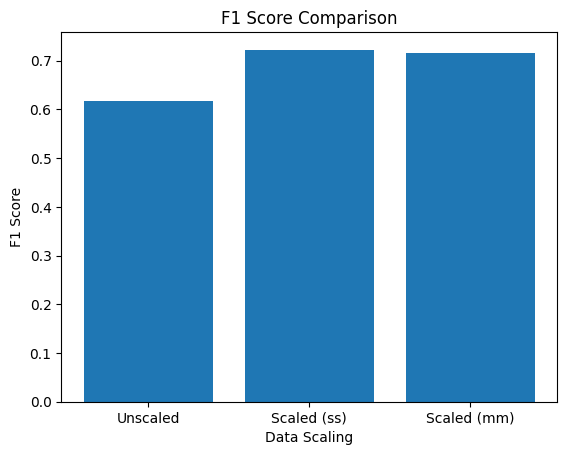


Classification Report (ss):
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      7013
           1       0.72      0.72      0.72      7006

    accuracy                           0.72     14019
   macro avg       0.72      0.72      0.72     14019
weighted avg       0.72      0.72      0.72     14019

                            -----------------------------------               

Logistic Regression (Lasso):
---------------------------------------------------------------
F1 Score: 0.72252
F1 Score w/Scaled Data (ss): 0.72255
F1 Score w/Scaled Data (mm): 0.72085


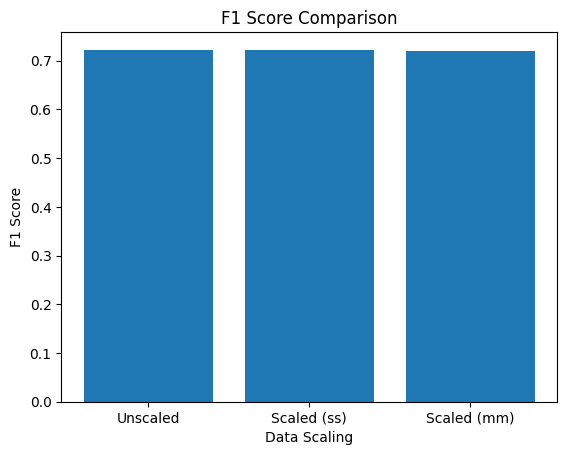


Classification Report (ss):
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      7013
           1       0.72      0.72      0.72      7006

    accuracy                           0.72     14019
   macro avg       0.72      0.72      0.72     14019
weighted avg       0.72      0.72      0.72     14019

                            -----------------------------------               

Logistic Regression (Ridge):
---------------------------------------------------------------
F1 Score: 0.66079
F1 Score w/Scaled Data (ss): 0.7224
F1 Score w/Scaled Data (mm): 0.71592


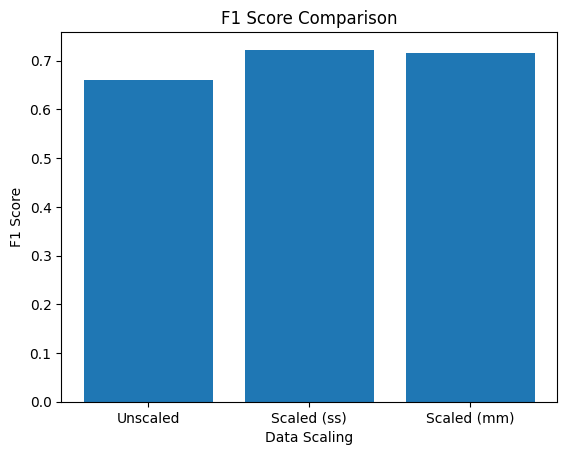


Classification Report (ss):
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      7013
           1       0.72      0.72      0.72      7006

    accuracy                           0.72     14019
   macro avg       0.72      0.72      0.72     14019
weighted avg       0.72      0.72      0.72     14019

                            -----------------------------------               

Logistic Regression (Elastic Net):
---------------------------------------------------------------
F1 Score: 0.61767
F1 Score w/Scaled Data (ss): 0.72254
F1 Score w/Scaled Data (mm): 0.7176


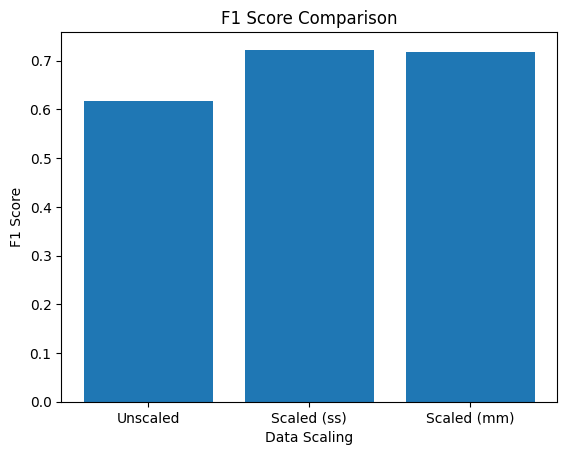


Classification Report (ss):
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      7013
           1       0.72      0.72      0.72      7006

    accuracy                           0.72     14019
   macro avg       0.72      0.72      0.72     14019
weighted avg       0.72      0.72      0.72     14019

                            -----------------------------------               

Decision Tree:
---------------------------------------------------------------
F1 Score: 0.74838
F1 Score w/Scaled Data (ss): 0.74843
F1 Score w/Scaled Data (mm): 0.75111


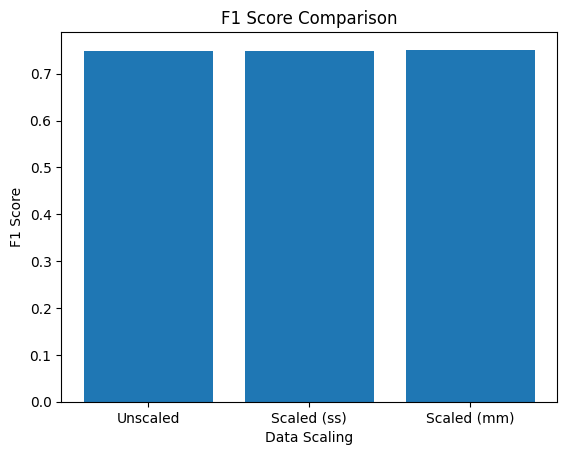


Classification Report (mm):
               precision    recall  f1-score   support

           0       0.76      0.73      0.74      7013
           1       0.74      0.76      0.75      7006

    accuracy                           0.75     14019
   macro avg       0.75      0.75      0.75     14019
weighted avg       0.75      0.75      0.75     14019

                            -----------------------------------               

SVM:
---------------------------------------------------------------
F1 Score: 0.64953
F1 Score w/Scaled Data (ss): 0.75437
F1 Score w/Scaled Data (mm): 0.72784


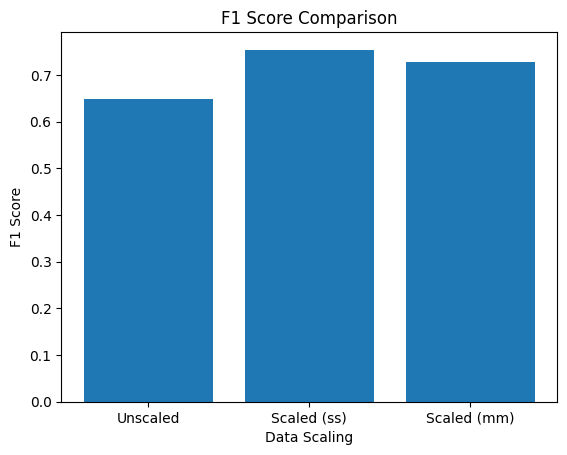


Classification Report (ss):
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      7013
           1       0.78      0.73      0.75      7006

    accuracy                           0.76     14019
   macro avg       0.76      0.76      0.76     14019
weighted avg       0.76      0.76      0.76     14019

                            -----------------------------------               

Random Forest:
---------------------------------------------------------------
F1 Score: 0.83161
F1 Score w/Scaled Data (ss): 0.83258
F1 Score w/Scaled Data (mm): 0.83419


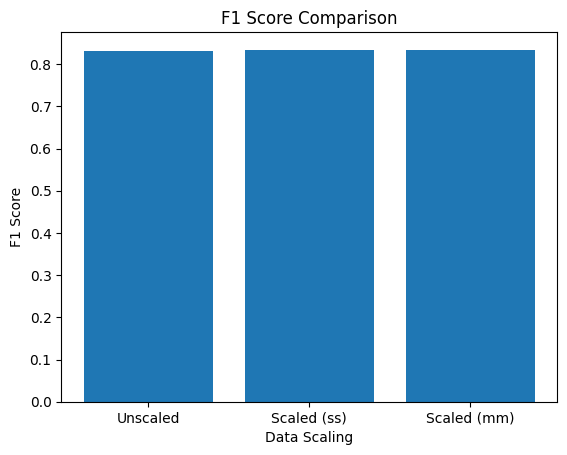


Classification Report (mm):
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      7013
           1       0.85      0.82      0.83      7006

    accuracy                           0.84     14019
   macro avg       0.84      0.84      0.84     14019
weighted avg       0.84      0.84      0.84     14019

                            -----------------------------------               

AdaBoost:
---------------------------------------------------------------
F1 Score: 0.74982
F1 Score w/Scaled Data (ss): 0.74982
F1 Score w/Scaled Data (mm): 0.74982


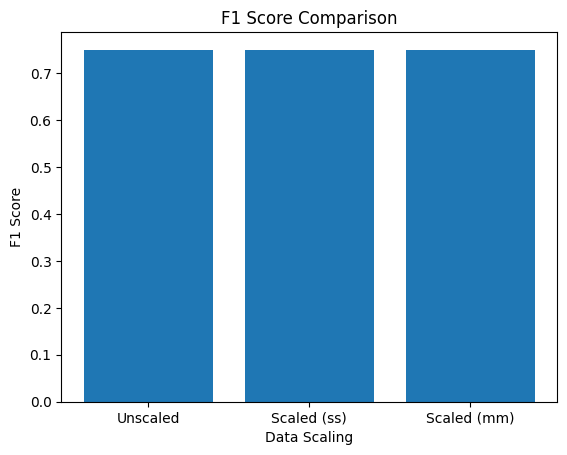


Classification Report (mm):
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      7013
           1       0.76      0.74      0.75      7006

    accuracy                           0.75     14019
   macro avg       0.76      0.75      0.75     14019
weighted avg       0.76      0.75      0.75     14019

                            -----------------------------------               

Gradient Boosting:
---------------------------------------------------------------
F1 Score: 0.77482
F1 Score w/Scaled Data (ss): 0.77482
F1 Score w/Scaled Data (mm): 0.77482


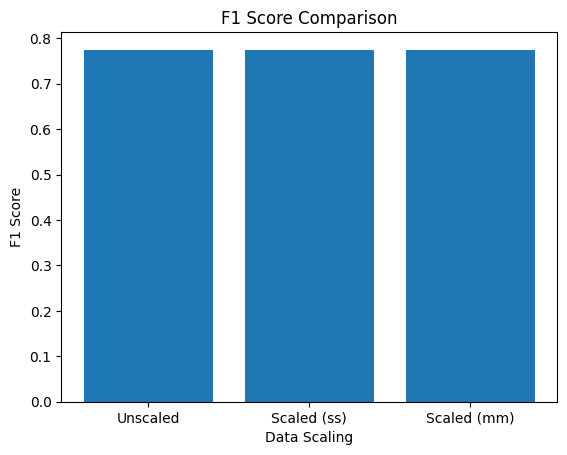


Classification Report (mm):
               precision    recall  f1-score   support

           0       0.76      0.82      0.79      7013
           1       0.81      0.75      0.77      7006

    accuracy                           0.78     14019
   macro avg       0.78      0.78      0.78     14019
weighted avg       0.78      0.78      0.78     14019

                            -----------------------------------               

XGBoost:
---------------------------------------------------------------
F1 Score: 0.82649
F1 Score w/Scaled Data (ss): 0.82649
F1 Score w/Scaled Data (mm): 0.82649


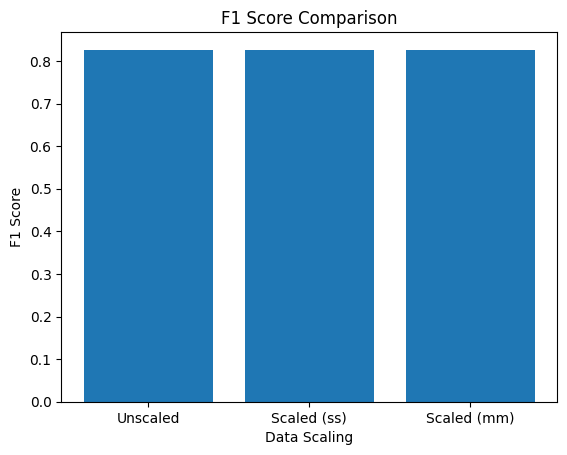


Classification Report (mm):
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      7013
           1       0.85      0.81      0.83      7006

    accuracy                           0.83     14019
   macro avg       0.83      0.83      0.83     14019
weighted avg       0.83      0.83      0.83     14019

                            -----------------------------------               

KNN:
---------------------------------------------------------------
F1 Score: 0.76159
F1 Score w/Scaled Data (ss): 0.75441
F1 Score w/Scaled Data (mm): 0.73517


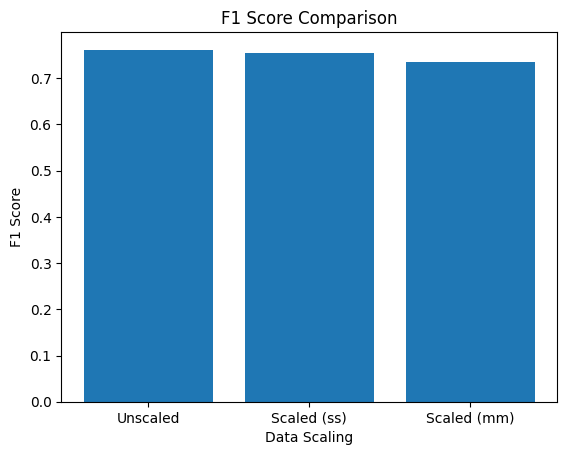


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.60      0.69      7013
           1       0.68      0.86      0.76      7006

    accuracy                           0.73     14019
   macro avg       0.75      0.73      0.73     14019
weighted avg       0.75      0.73      0.73     14019

                            -----------------------------------               

Naive Bayes:
---------------------------------------------------------------
F1 Score: 0.67676
F1 Score w/Scaled Data (ss): 0.68747
F1 Score w/Scaled Data (mm): 0.68747


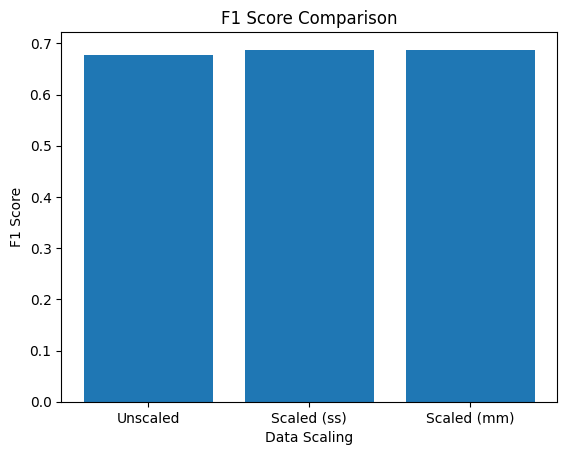


Classification Report (mm):
               precision    recall  f1-score   support

           0       0.75      0.25      0.38      7013
           1       0.55      0.92      0.69      7006

    accuracy                           0.58     14019
   macro avg       0.65      0.58      0.53     14019
weighted avg       0.65      0.58      0.53     14019

                            -----------------------------------               

MLP Classifier:
---------------------------------------------------------------
F1 Score: 0.67783
F1 Score w/Scaled Data (ss): 0.7677
F1 Score w/Scaled Data (mm): 0.76273


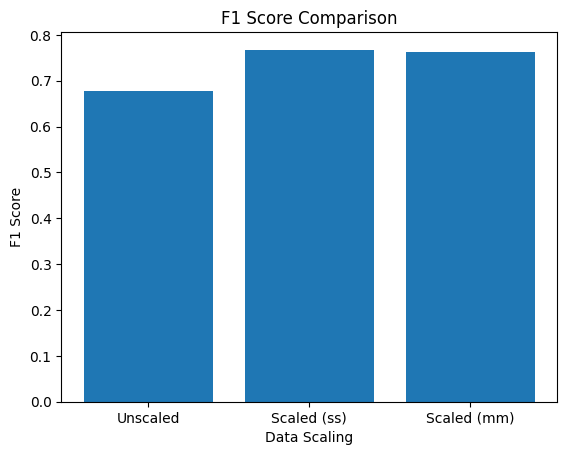


Classification Report (ss):
               precision    recall  f1-score   support

           0       0.76      0.79      0.78      7013
           1       0.78      0.75      0.77      7006

    accuracy                           0.77     14019
   macro avg       0.77      0.77      0.77     14019
weighted avg       0.77      0.77      0.77     14019

                            -----------------------------------               



In [33]:
#run all models
run_models(X_train, y_train, X_test, y_test)

In summary, random forest consistently outperformed other models with high F1 scores, regardless of data scaling. Additionally, certain models, such as logistic regression and KNN, displayed different behaviors depending on the data scaling technique employed. The results highlight the importance of selecting the appropriate model and data preprocessing for achieving the best classification performance in a given context.

# KNN with hyperparameter tuning

### Using grid search for KNN

In [25]:
# Define the hyperparameters and their possible values for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust the number of neighbors you want to test
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

In [26]:
knn = KNeighborsClassifier()

In [27]:
# Create a GridSearchCV object
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='f1', cv=5, verbose = 3)

In [28]:
# Fit the grid search to your data
grid_search_knn.fit(X_train_mm_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END n_neighbors=3, p=1, weights=uniform;, score=0.751 total time=   1.7s
[CV 2/5] END n_neighbors=3, p=1, weights=uniform;, score=0.747 total time=   1.3s
[CV 3/5] END n_neighbors=3, p=1, weights=uniform;, score=0.747 total time=   1.2s
[CV 4/5] END n_neighbors=3, p=1, weights=uniform;, score=0.742 total time=   1.4s
[CV 5/5] END n_neighbors=3, p=1, weights=uniform;, score=0.754 total time=   1.3s
[CV 1/5] END n_neighbors=3, p=1, weights=distance;, score=0.763 total time=   1.5s
[CV 2/5] END n_neighbors=3, p=1, weights=distance;, score=0.760 total time=   1.5s
[CV 3/5] END n_neighbors=3, p=1, weights=distance;, score=0.763 total time=   1.6s
[CV 4/5] END n_neighbors=3, p=1, weights=distance;, score=0.757 total time=   1.6s
[CV 5/5] END n_neighbors=3, p=1, weights=distance;, score=0.770 total time=   1.6s
[CV 1/5] END n_neighbors=3, p=2, weights=uniform;, score=0.732 total time=   0.4s
[CV 2/5] END n_neighbors=3, p=2,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)

In [29]:
### List the best parameter out of the given set of parameters
print("Best hyperparameters: ", grid_search_knn.best_params_)

Best hyperparameters:  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [30]:
y_pred_knn_grid = grid_search_knn.predict(X_test_mm_scaled)

In [33]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_knn_grid))
print(confusion_matrix(y_test,y_pred_knn_grid))
print("Accuracy:",(accuracy_score(y_test,y_pred_knn_grid)))
print("F1 Score:", (f1_score(y_test, y_pred_knn_grid)))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      7013
           1       0.76      0.80      0.78      7006

    accuracy                           0.77     14019
   macro avg       0.77      0.77      0.77     14019
weighted avg       0.77      0.77      0.77     14019

[[5246 1767]
 [1404 5602]]
Accuracy: 0.7738069762465226
F1 Score: 0.779408695652174


### KNN Random SearchCV

In [34]:
# Define the parameter distributions for KNN
param_dist = {
    'n_neighbors': np.arange(1, 21),  # Adjust the range as needed
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

In [35]:
# Create a K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

In [36]:
# Create a RandomizedSearchCV object with F1 score as the scoring parameter
random_search_knn = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    scoring='f1',
    cv=5,
    n_iter=10,  # You can adjust the number of iterations
    verbose=3
)

In [37]:
random_search_knn.fit(X_train_mm_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END n_neighbors=15, p=1, weights=distance;, score=0.771 total time=   1.2s
[CV 2/5] END n_neighbors=15, p=1, weights=distance;, score=0.760 total time=   1.4s
[CV 3/5] END n_neighbors=15, p=1, weights=distance;, score=0.766 total time=   1.9s
[CV 4/5] END n_neighbors=15, p=1, weights=distance;, score=0.760 total time=   1.9s
[CV 5/5] END n_neighbors=15, p=1, weights=distance;, score=0.774 total time=   1.8s
[CV 1/5] END n_neighbors=2, p=2, weights=distance;, score=0.734 total time=   0.5s
[CV 2/5] END n_neighbors=2, p=2, weights=distance;, score=0.731 total time=   0.6s
[CV 3/5] END n_neighbors=2, p=2, weights=distance;, score=0.742 total time=   0.5s
[CV 4/5] END n_neighbors=2, p=2, weights=distance;, score=0.732 total time=   0.5s
[CV 5/5] END n_neighbors=2, p=2, weights=distance;, score=0.734 total time=   0.6s
[CV 1/5] END n_neighbors=12, p=2, weights=uniform;, score=0.721 total time=   0.6s
[CV 2/5] END n_neighb

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='f1', verbose=3)

In [38]:
## Getting the best parameters
print("Best parameters:", random_search_knn.best_params_)

Best parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 13}


In [39]:
### Predicting the target value
y_pred_knn_rand= random_search_knn.predict(X_test)

In [40]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_knn_rand))
print(confusion_matrix(y_test,y_pred_knn_rand))
print("Accuracy:",(accuracy_score(y_test,y_pred_knn_rand)))
print("F1 Score:", (f1_score(y_test, y_pred_knn_rand)))

              precision    recall  f1-score   support

           0       0.51      0.99      0.67      7013
           1       0.77      0.04      0.07      7006

    accuracy                           0.51     14019
   macro avg       0.64      0.51      0.37     14019
weighted avg       0.64      0.51      0.37     14019

[[6937   76]
 [6757  249]]
Accuracy: 0.5125900563520935
F1 Score: 0.06793070522438957


### Comparing the results of Random Search and Grid Search for KNN:

| Metric                   | Precision (Class 0) | Precision (Class 1) | Recall (Class 0) | Recall (Class 1) | F1-score (Class 0) | F1-score (Class 1) | Accuracy | Overall F1 Score |
|--------------------------|---------------------|---------------------|-----------------|-----------------|--------------------|--------------------|----------|-------------------|
| Random Search KNN       | 0.51                | 0.77                | 0.99            | 0.04            | 0.67               | 0.07               | 0.51     | 0.0679            |
| Grid Search KNN         | 0.79                | 0.76                | 0.75            | 0.80            | 0.77               | 0.78               | 0.77     | 0.7794            |

The Grid Search for KNN outperforms the Random Search KNN model in multiple aspects. It achieves a better balance between precision and recall for both classes, resulting in higher F1-scores and improved overall accuracy. In contrast, the Random Search KNN model exhibits imbalanced and overall poor performance, with an extremely low F1 score. The choice between these two models is clear, with the Grid Search KNN model being the better-performing option for the given dataset and classification task.

# Logistic regression with hyperparameter tuning

#### Logistic regression Hyperparameter grid SearchCV

In [41]:
### Parameters for Logistic regression
param_lr = {'C': [0.01, 0.1, 1.0, 10.0],
                    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']}

In [42]:
reg=LogisticRegression()

In [43]:
grid_search_lr=GridSearchCV(estimator=reg, param_grid=param_lr, scoring='f1', cv=5, verbose = 3)

In [51]:
grid_search_lr.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.733 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1, solver=libli

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             scoring='f1', verbose=3)

In [45]:
### List the best parameter out of the given set of parameters
print(grid_search_lr.best_params_)

{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [52]:
## predicting the target variable and storing in y_pred1
y_pred_reg_grid=grid_search_lr.predict(X_test_scaled)

In [53]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_reg_grid))
print(confusion_matrix(y_test,y_pred_reg_grid))
print("Accuracy:",(accuracy_score(y_test,y_pred_reg_grid)))
print("F1 Score:", (f1_score(y_test, y_pred_reg_grid)))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      7013
           1       0.72      0.72      0.72      7006

    accuracy                           0.72     14019
   macro avg       0.72      0.72      0.72     14019
weighted avg       0.72      0.72      0.72     14019

[[5080 1933]
 [1941 5065]]
Accuracy: 0.7236607461302518
F1 Score: 0.7233647529277349


## Random SearchCV

In [55]:
random_search_lr= RandomizedSearchCV(estimator=reg, param_distributions=param_lr, n_iter=10, scoring='f1', cv=5, verbose = 3)

In [56]:
random_search_lr.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....C=10.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=10.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=10.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=10.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=10.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=10.0, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1.0, 10.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'saga']},
                   scoring='f1', verbose=3)

In [57]:
## Getting the best parameters
print("Best parameters:", random_search_lr.best_params_)

Best parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 0.1}


In [60]:
### Predicting the target value
y_pred_lr_rand= random_search_lr.predict(X_test_scaled)

In [61]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_lr_rand))
print(confusion_matrix(y_test,y_pred_lr_rand))
print("Accuracy:",(accuracy_score(y_test,y_pred_lr_rand)))
print("F1 Score:", (f1_score(y_test, y_pred_lr_rand)))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      7013
           1       0.72      0.72      0.72      7006

    accuracy                           0.72     14019
   macro avg       0.72      0.72      0.72     14019
weighted avg       0.72      0.72      0.72     14019

[[5080 1933]
 [1941 5065]]
Accuracy: 0.7236607461302518
F1 Score: 0.7233647529277349


## Comparing the results of Grid Search and Random Search for Logistic Regression:

| Metric                         | Precision (Class 0) | Precision (Class 1) | Recall (Class 0) | Recall (Class 1) | F1-score (Class 0) | F1-score (Class 1) | Accuracy |
|--------------------------------|---------------------|---------------------|-----------------|-----------------|--------------------|--------------------|----------|
| Random Search Logistic Regression | 0.72                | 0.72                | 0.72            | 0.72            | 0.72               | 0.72               | 0.7237   |
| Grid Search Logistic Regression   | 0.72                | 0.72                | 0.72            | 0.72            | 0.72               | 0.72               | 0.7237   |


In summary, Random Search and Grid Search yielded very similar results for the Logistic Regression model, indicating that the hyperparameter tuning did not lead to significant differences in model performance. The Logistic Regression model performs consistently with a reasonable balance between precision and recall.

# Decision Tree with hyperparameter tuning

#### Decision tree Hyper parameter : grid SearchCV

In [62]:
### Parameter for decision tree
param_dt = {'max_depth': [2, 5, 10, 20, 30, 50],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
              }

In [63]:
dt=DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_dt, scoring='f1', cv=5, verbose = 3)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.568 total time=   0.1s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.559 total time=   0.1s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.552 total time=   0.1s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.569 total time=   0.1s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.557 total time=   0.1s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.568 total time=   0.1s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.559 total time=   0.1s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.552 total time=   0.1s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.569 total time=   0.1s
[CV 5/5] END max_depth=2, min_samples_leaf=1, m

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=3)

In [64]:
print(grid_search_dt.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [65]:
# Predicting the target value
y_pred_dt_grid= grid_search_dt.predict(X_test)

In [66]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_dt_grid))
print(confusion_matrix(y_test,y_pred_dt_grid))
print("Accuracy:",(accuracy_score(y_test,y_pred_dt_grid)))
print("F1 Score:", (f1_score(y_test, y_pred_dt_grid)))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      7013
           1       0.74      0.76      0.75      7006

    accuracy                           0.75     14019
   macro avg       0.75      0.75      0.75     14019
weighted avg       0.75      0.75      0.75     14019

[[5177 1836]
 [1656 5350]]
Accuracy: 0.7509094799914402
F1 Score: 0.7539458850056369


### Decision tree Random SearchCV

In [69]:
random_search_dt= RandomizedSearchCV(estimator=dt, param_distributions=param_dt, n_iter=10, scoring='f1', cv=5, verbose = 3)

In [70]:
random_search_dt.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.744 total time=   0.7s
[CV 2/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.746 total time=   0.7s
[CV 3/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.739 total time=   0.7s
[CV 4/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.739 total time=   0.7s
[CV 5/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.740 total time=   0.7s
[CV 1/5] END max_depth=50, min_samples_leaf=4, min_samples_split=2;, score=0.738 total time=   1.1s
[CV 2/5] END max_depth=50, min_samples_leaf=4, min_samples_split=2;, score=0.725 total time=   1.1s
[CV 3/5] END max_depth=50, min_samples_leaf=4, min_samples_split=2;, score=0.740 total time=   1.1s
[CV 4/5] END max_depth=50, min_samples_leaf=4, min_samples_split=2;, score=0.736 total time=   1.1s
[CV 5/5] END max_depth=50, min_sam

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [2, 5, 10, 20, 30, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='f1', verbose=3)

In [71]:
## Getting the best parameters
print("Best parameters:", random_search_dt.best_params_)

Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [72]:
### Predicting the target value
y_pred_dt_rand= random_search_dt.predict(X_test)

In [73]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_dt_rand))
print(confusion_matrix(y_test,y_pred_dt_rand))
print("Accuracy:",(accuracy_score(y_test,y_pred_dt_rand)))
print("F1 Score:", (f1_score(y_test, y_pred_dt_rand)))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      7013
           1       0.74      0.78      0.76      7006

    accuracy                           0.75     14019
   macro avg       0.75      0.75      0.75     14019
weighted avg       0.75      0.75      0.75     14019

[[5076 1937]
 [1567 5439]]
Accuracy: 0.7500534988230259
F1 Score: 0.7563621193158114


## Comparing the results for Decision Tree obtained from Grid Search and Random Search:

| Metric                    | Precision (Class 0) | Precision (Class 1) | Recall (Class 0) | Recall (Class 1) | F1-score (Class 0) | F1-score (Class 1) | Accuracy |
|---------------------------|---------------------|---------------------|-----------------|-----------------|--------------------|--------------------|----------|
| Random Search Decision Tree | 0.76                | 0.74                | 0.72            | 0.78            | 0.74               | 0.76               | 0.7501   |
| Grid Search Decision Tree   | 0.76                | 0.74                | 0.74            | 0.76            | 0.75               | 0.75               | 0.7509   |


The Random Search and Grid Search for the Decision Tree model produced very similar results in terms of precision, recall, F1-score, accuracy, and the confusion matrix. Both approaches achieved an F1-score of around 0.75, indicating a good balance between precision and recall. These results suggest that the Decision Tree model, with its hyperparameters optimized through either Random Search or Grid Search, performs consistently well on the dataset. The choice between the two search methods may depend on other factors, such as computational resources and time constraints, as the performance remains quite similar.

# Random Forest with hyperparameter tuning

###  Random forest for Grid Search 

In [74]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

In [75]:
rf = RandomForestClassifier(random_state=42)
grid_search_rf= GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', verbose = 3)
grid_search_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.834 total time=  18.1s
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.824 total time=  17.8s
[CV 3/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.826 total time=  18.0s
[CV 4/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.824 total time=  17.8s
[CV 5/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.838 total time=  17.8s
[CV 1/5] END max_depth=None, min_samples_split=2, n_estimators=200;, score=0.836 total time=  36.1s
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=200;, score=0.828 total time=  35.6s
[CV 3/5] END max_depth=None, min_samples_split=2, n_estimators=200;, score=0.829 total time=  36.3s
[CV 4/5] END max_depth=None, min_samples_split=2, n_estimators=200;, score=0.828 total time=  35.9s
[CV 5/5] END max_depth=None, min_sampl

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=3)

In [76]:
print(grid_search_rf.best_params_)

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}


In [77]:
### predicting the target variable
y_pred_rf_grid= grid_search_rf.predict(X_test_scaled)

In [78]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_rf_grid))
print(confusion_matrix(y_test,y_pred_rf_grid))
print("Accuracy:",(accuracy_score(y_test,y_pred_rf_grid)))
print("F1 Score:", (f1_score(y_test, y_pred_rf_grid)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      7013
           1       0.85      0.83      0.84      7006

    accuracy                           0.84     14019
   macro avg       0.84      0.84      0.84     14019
weighted avg       0.84      0.84      0.84     14019

[[6019  994]
 [1195 5811]]
Accuracy: 0.8438547685284257
F1 Score: 0.841503149663312


### Random Forest Random SearchCV

In [80]:
random_search_rf= RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, scoring='f1', cv=5, verbose = 3)

In [81]:
random_search_rf.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=30, min_samples_split=2, n_estimators=300;, score=0.837 total time=  53.6s
[CV 2/5] END max_depth=30, min_samples_split=2, n_estimators=300;, score=0.828 total time=  51.9s
[CV 3/5] END max_depth=30, min_samples_split=2, n_estimators=300;, score=0.829 total time=  51.8s
[CV 4/5] END max_depth=30, min_samples_split=2, n_estimators=300;, score=0.828 total time=  51.9s
[CV 5/5] END max_depth=30, min_samples_split=2, n_estimators=300;, score=0.842 total time=  51.7s
[CV 1/5] END max_depth=None, min_samples_split=5, n_estimators=300;, score=0.832 total time=  51.1s
[CV 2/5] END max_depth=None, min_samples_split=5, n_estimators=300;, score=0.820 total time=  50.8s
[CV 3/5] END max_depth=None, min_samples_split=5, n_estimators=300;, score=0.825 total time=  51.0s
[CV 4/5] END max_depth=None, min_samples_split=5, n_estimators=300;, score=0.823 total time=  50.8s
[CV 5/5] END max_depth=None, min_samples_split=5,

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='f1', verbose=3)

In [82]:
## Getting the best parameters
print("Best parameters:", random_search_rf.best_params_)

Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 30}


In [83]:
### Predicting the target value
y_pred_rf_rand= random_search_knn.predict(X_test_scaled)

In [84]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_rf_rand))
print(confusion_matrix(y_test,y_pred_rf_rand))
print("Accuracy:",(accuracy_score(y_test,y_pred_rf_rand)))
print("F1 Score:", (f1_score(y_test, y_pred_rf_rand)))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73      7013
           1       0.78      0.52      0.63      7006

    accuracy                           0.69     14019
   macro avg       0.71      0.69      0.68     14019
weighted avg       0.71      0.69      0.68     14019

[[5984 1029]
 [3345 3661]]
Accuracy: 0.6879948641129895
F1 Score: 0.6260259917920656


## Comparing the results for Random Forest obtained from Grid Search and Random Search:

| Metric                    | Accuracy  | F1 Score | Precision (Class 0) | Recall (Class 0) | F1-score (Class 0) | Precision (Class 1) | Recall (Class 1) | F1-score (Class 1) |
|---------------------------|-----------|----------|-----------------------|-------------------|--------------------|-----------------------|-------------------|--------------------|
| Random Search RF          | 0.68799   | 0.62603  | 0.64                  | 0.85              | 0.73               | 0.78                  | 0.52              | 0.63               |
| Grid Search RF            | 0.84385   | 0.84150  | 0.83                  | 0.86              | 0.85               | 0.85                  | 0.83              | 0.84               |


The Grid Search for the Random Forest model outperforms the Random Search in terms of both accuracy and F1 score. It achieves a higher overall accuracy and a better F1 score, indicating a better trade-off between precision and recall for both classes. The Grid Search model is the preferred choice for this particular classification task. It provides a more balanced and accurate classification, making it a suitable model for the dataset.

# XGBoosting with hyperparameter tuning

### XGBoosting Grid Search

In [85]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [86]:
# Create an XGBoost classifier
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

In [87]:
# Create GridSearchCV object
grid_search_xg = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='f1', verbose = 3)

In [88]:
# Fit the model to the data (perform grid search)
grid_search_xg.fit(X_train_mm_scaled, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.702 total time=   0.1s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.710 total time=   0.1s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.714 total time=   0.1s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.696 total time=   0.1s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.708 total time=   0.1s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.713 total time=   0.1s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0;, score=0.693 total time=   0.1s
[CV 2/3] END 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.001], 'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='f1', verbose=3)

In [89]:
# Get the best parameters and best score
best_params = grid_search_xg.best_params_
print(best_params)

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [90]:
y_pred_xg_grid=grid_search_xg.predict(X_test_mm_scaled)

In [91]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_xg_grid))
print(confusion_matrix(y_test,y_pred_xg_grid))
print("Accuracy:",(accuracy_score(y_test,y_pred_xg_grid)))
print("F1 Score:", (f1_score(y_test, y_pred_xg_grid)))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      7013
           1       0.81      0.72      0.76      7006

    accuracy                           0.78     14019
   macro avg       0.78      0.78      0.78     14019
weighted avg       0.78      0.78      0.78     14019

[[5850 1163]
 [1973 5033]]
Accuracy: 0.7763035879877309
F1 Score: 0.7624602332979852


###  XGBoosting Random SearchCV

In [92]:
random_search_xg= RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=10, scoring='f1', cv=5, verbose = 3)

In [93]:
random_search_xg.fit(X_train_mm_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=1.0;, score=0.725 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=1.0;, score=0.707 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=1.0;, score=0.719 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=1.0;, score=0.730 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=1.0;, score=0.716 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8;, score=0.727 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8;, score=0.710 total time=   0.1s
[CV 3/5] END co

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.001],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='f1', verbose=3)

In [94]:
## Getting the best parameters
print("Best parameters:", random_search_xg.best_params_)

Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.001, 'colsample_bytree': 0.8}


In [95]:
### Predicting the target value
y_pred_xg_rand= random_search_xg.predict(X_test_mm_scaled)

In [96]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_xg_rand))
print(confusion_matrix(y_test,y_pred_xg_rand))
print("Accuracy:",(accuracy_score(y_test,y_pred_xg_rand)))
print("F1 Score:", (f1_score(y_test, y_pred_xg_rand)))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77      7013
           1       0.80      0.68      0.73      7006

    accuracy                           0.75     14019
   macro avg       0.76      0.75      0.75     14019
weighted avg       0.76      0.75      0.75     14019

[[5796 1217]
 [2230 4776]]
Accuracy: 0.7541194093729938
F1 Score: 0.7348257558273713


## Comparing the results for XG Boost obtained from Grid Search and Random Search:

| Metric                     | Accuracy | F1 Score | Precision (Class 0) | Precision (Class 1) | Recall (Class 0) | Recall (Class 1) | True Positives (Class 0) | True Positives (Class 1) | False Positives (Class 0) | False Positives (Class 1) |
|-----------------------------|----------|----------|----------------------|----------------------|------------------|------------------|--------------------------|--------------------------|---------------------------|---------------------------|
| Random Search XGBoosting   | 0.754    | 0.735    | 0.72                 | 0.80                 | 0.83             | 0.68             | 5796                     | 4776                     | 1217                      | 2230                      |
| Grid Search XGBoosting     | 0.776    | 0.762    | 0.75                 | 0.81                 | 0.83             | 0.72             | 5850                     | 5033                     | 1163                      | 1973                      |


Grid Search for XGBoosting outperforms Random Search in terms of accuracy and F1 score. It achieves higher precision and recall for both classes, indicating better overall classification performance.
Grid Search shows a more balanced trade-off between precision and recall for class 0 and class 1, resulting in a higher F1 score.
The confusion matrix of Grid Search indicates a more favorable distribution of true positives and true negatives, particularly for class 1.
Both Random Search and Grid Search models demonstrate a relatively high accuracy, but Grid Search is more effective in correctly identifying instances of both class 0 and class 1, leading to an improved F1 score.
In summary, the Grid Search for XGBoosting presents a more robust and balanced model for this classification task compared to the Random Search, offering improved accuracy and F1 score along with better precision and recall.

# Ada boosting with hyperparameter tuning

#### Ada boosting Grid Search

In [97]:
# Hyperparameters for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

In [98]:
ada_classifier = AdaBoostClassifier()

In [99]:
grid_search_ada = GridSearchCV(ada_classifier, param_grid, cv=5,scoring='f1', verbose = 3)

In [100]:
grid_search_ada.fit(X_train_mm_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=0.616 total time=   5.0s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.613 total time=   5.0s
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=0.621 total time=   5.0s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=0.627 total time=   5.0s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.614 total time=   5.1s
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.616 total time=  10.0s
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=0.613 total time=  10.0s
[CV 3/5] END learning_rate=0.01, n_estimators=100;, score=0.621 total time=   9.9s
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=0.629 total time=  10.0s
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=0.614 total time=  10.0s
[CV 1/5] END learning_rate=0.01, n_estimators=200;, score=0.640 total time=  19.8s
[CV 2/5] END learning_rate=0.01,

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=3)

In [101]:
print(grid_search_ada.best_params_)

{'learning_rate': 1.0, 'n_estimators': 200}


In [102]:
y_pred_ada_grid = grid_search_ada.predict(X_test_mm_scaled)

In [103]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_ada_grid))
print(confusion_matrix(y_test,y_pred_ada_grid))
print("Accuracy:",(accuracy_score(y_test,y_pred_ada_grid)))
print("F1 Score:", (f1_score(y_test, y_pred_ada_grid)))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      7013
           1       0.79      0.75      0.77      7006

    accuracy                           0.78     14019
   macro avg       0.78      0.78      0.78     14019
weighted avg       0.78      0.78      0.78     14019

[[5649 1364]
 [1778 5228]]
Accuracy: 0.7758755974035237
F1 Score: 0.7689366083247536


## Random Search CV

In [104]:
random_search_ada= RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid, n_iter=10, scoring='f1', cv=5, verbose = 3)

In [105]:
random_search_ada.fit(X_train_mm_scaled,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=0.616 total time=   5.0s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.613 total time=   5.0s
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=0.621 total time=   5.0s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=0.627 total time=   5.0s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.614 total time=   5.0s
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.616 total time=  10.0s
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=0.613 total time=  10.0s
[CV 3/5] END learning_rate=0.01, n_estimators=100;, score=0.621 total time=  10.0s
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=0.629 total time=   9.9s
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=0.614 total time=  10.1s
[CV 1/5] END learning_rate=0.01, n_estimators=200;, score=0.640 total time=  20.1s
[CV 2/5] END learning_rate=0.01,

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'n_estimators': [50, 100, 200]},
                   scoring='f1', verbose=3)

In [106]:
## Getting the best parameters
print("Best parameters:", random_search_ada.best_params_)

Best parameters: {'n_estimators': 200, 'learning_rate': 1.0}


In [107]:
### Predicting the target value
y_pred_ada_rand= random_search_ada.predict(X_test_mm_scaled)

In [108]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_ada_rand))
print(confusion_matrix(y_test,y_pred_ada_rand))
print("Accuracy:",(accuracy_score(y_test,y_pred_ada_rand)))
print("F1 Score:", (f1_score(y_test, y_pred_ada_rand)))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      7013
           1       0.79      0.75      0.77      7006

    accuracy                           0.78     14019
   macro avg       0.78      0.78      0.78     14019
weighted avg       0.78      0.78      0.78     14019

[[5649 1364]
 [1778 5228]]
Accuracy: 0.7758755974035237
F1 Score: 0.7689366083247536


## Comparing the results for Ada Boost obtained from Grid Search and Random Search:

| Metric                | Precision (Class 0) | Precision (Class 1) | Recall (Class 0) | Recall (Class 1) | F1 Score (Class 0) | F1 Score (Class 1) | Accuracy |
|-----------------------|----------------------|----------------------|------------------|------------------|--------------------|--------------------|----------|
| Random Search AdaBoost | 0.76                 | 0.79                 | 0.81             | 0.75             | 0.78               | 0.77               | 0.78     |
| Grid Search AdaBoost   | 0.76                 | 0.79                 | 0.81             | 0.75             | 0.78               | 0.77               | 0.78     |



In summary, both Random Search and Grid Search for AdaBoost produce highly similar results with an F1 score of around 0.78, indicating balanced precision and recall for both classes. The model exhibits balanced classification performance without a significant difference between the two hyperparameter tuning methods. Therefore, the choice between Random Search and Grid Search for AdaBoost might come down to other factors such as computational efficiency or specific tuning objectives.

# Gradient boosting with hyperparameter tuning

#### Gradient boosting Grid Search

In [109]:
# Hyperparameters for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5],
}

In [110]:
gb_classifier = GradientBoostingClassifier()

In [111]:
grid_search_gb = GridSearchCV(gb_classifier, param_grid, cv=5,scoring='f1', verbose = 3)

In [112]:
grid_search_gb.fit(X_train_mm_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.698 total time=  13.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.703 total time=  14.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.702 total time=  14.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.716 total time=  13.4s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.712 total time=  13.3s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.699 total time=  28.7s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.696 total time=  27.4s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.707 total time=  26.5s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.712 total time=  26.5s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.706 to

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=3)

In [113]:
print(grid_search_gb.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [114]:
y_pred_g_grid = grid_search_gb.predict(X_test_mm_scaled)

In [115]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_g_grid))
print(confusion_matrix(y_test,y_pred_g_grid))
print("Accuracy:",(accuracy_score(y_test,y_pred_g_grid)))
print("F1 Score:", (f1_score(y_test, y_pred_g_grid)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      7013
           1       0.84      0.79      0.81      7006

    accuracy                           0.82     14019
   macro avg       0.82      0.82      0.82     14019
weighted avg       0.82      0.82      0.82     14019

[[5984 1029]
 [1483 5523]]
Accuracy: 0.8208146087452742
F1 Score: 0.8147219353887004


### Gradient boosting Random SearchCV

In [116]:
random_search_gd= RandomizedSearchCV(estimator=gb_classifier, param_distributions=param_grid, n_iter=10, scoring='f1', cv=5, verbose = 3)

In [117]:
random_search_gd.fit(X_train_mm_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.748 total time= 1.2min
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.741 total time= 1.2min
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.745 total time= 1.2min
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.749 total time= 1.3min
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.761 total time= 1.2min
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.777 total time=  17.3s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.766 total time=  17.3s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.775 total time=  17.3s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.770 total time=  17.4s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.783 total ti

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 100, 200]},
                   scoring='f1', verbose=3)

In [118]:
## Getting the best parameters
print("Best parameters:", random_search_gd.best_params_)

Best parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 1.0}


In [119]:
### Predicting the target value
y_pred_gd_rand= random_search_gd.predict(X_test_mm_scaled)

In [120]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_gd_rand))
print(confusion_matrix(y_test,y_pred_gd_rand))
print("Accuracy:",(accuracy_score(y_test,y_pred_gd_rand)))
print("F1 Score:", (f1_score(y_test, y_pred_gd_rand)))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      7013
           1       0.81      0.80      0.81      7006

    accuracy                           0.81     14019
   macro avg       0.81      0.81      0.81     14019
weighted avg       0.81      0.81      0.81     14019

[[5711 1302]
 [1404 5602]]
Accuracy: 0.8069762465225765
F1 Score: 0.8054636951833214


## Comparing the results for Gradient Boosting obtained from Grid Search and Random Search:

| Metric                | Precision (Class 0) | Precision (Class 1) | Recall (Class 0) | Recall (Class 1) | F1-score (Class 0) | F1-score (Class 1) | Accuracy | Overall F1 Score |
|-----------------------|---------------------|---------------------|-----------------|-----------------|--------------------|--------------------|----------|------------------|
| Random Search         | 0.80                | 0.81                | 0.81            | 0.80            | 0.81               | 0.81               | 0.8069   | 0.8055           |
| Grid Search           | 0.80                | 0.84                | 0.85            | 0.79            | 0.83               | 0.81               | 0.8208   | 0.8147           |



In the comparison between Random Search and Grid Search for the Gradient Boosting model, Grid Search demonstrates superior performance. Grid Search achieves higher precision, recall, and F1-scores for both classes, resulting in an overall higher accuracy of 0.8208 and an F1 score of 0.8147. These results indicate that Grid Search yields better model performance, particularly in terms of balanced classification for both classes. Therefore, the Grid Search is the recommended choice for this classification task, offering improved accuracy and F1 scores compared to Random Search.

# Naive Bayes with hyperparameter tuning

#### Naive Bayes Grid Search

In [121]:
param_grid = {
    'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]
}

In [122]:
nb_classifier = GaussianNB()

In [123]:
grid_search_nb = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='f1', verbose = 3)

In [124]:
grid_search_nb.fit(X_train_mm_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......................priors=None;, score=0.696 total time=   0.0s
[CV 2/5] END .......................priors=None;, score=0.683 total time=   0.0s
[CV 3/5] END .......................priors=None;, score=0.696 total time=   0.0s
[CV 4/5] END .......................priors=None;, score=0.690 total time=   0.0s
[CV 5/5] END .......................priors=None;, score=0.682 total time=   0.0s
[CV 1/5] END .................priors=[0.1, 0.9];, score=0.682 total time=   0.0s
[CV 2/5] END .................priors=[0.1, 0.9];, score=0.677 total time=   0.0s
[CV 3/5] END .................priors=[0.1, 0.9];, score=0.683 total time=   0.0s
[CV 4/5] END .................priors=[0.1, 0.9];, score=0.682 total time=   0.0s
[CV 5/5] END .................priors=[0.1, 0.9];, score=0.676 total time=   0.0s
[CV 1/5] END .................priors=[0.2, 0.8];, score=0.685 total time=   0.0s
[CV 2/5] END .................priors=[0.2, 0.8];,

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7],
                                    [0.4, 0.6], [0.5, 0.5]]},
             scoring='f1', verbose=3)

In [125]:
print(grid_search_nb.best_params_)

{'priors': [0.5, 0.5]}


In [126]:
y_pred_nb_grid = grid_search_nb.predict(X_test_mm_scaled)

In [127]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_nb_grid))
print(confusion_matrix(y_test,y_pred_nb_grid))
print("Accuracy:",(accuracy_score(y_test,y_pred_nb_grid)))
print("F1 Score:", (f1_score(y_test, y_pred_nb_grid)))

              precision    recall  f1-score   support

           0       0.76      0.26      0.39      7013
           1       0.55      0.92      0.69      7006

    accuracy                           0.59     14019
   macro avg       0.66      0.59      0.54     14019
weighted avg       0.66      0.59      0.54     14019

[[1820 5193]
 [ 572 6434]]
Accuracy: 0.5887723803409658
F1 Score: 0.6906026941447969


### Naive Bayes Random SearchCV

In [128]:
random_search_nb= RandomizedSearchCV(estimator=nb_classifier, param_distributions=param_grid, n_iter=10, scoring='f1', cv=5, verbose = 3)

In [129]:
random_search_nb.fit(X_train_mm_scaled,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......................priors=None;, score=0.696 total time=   0.0s
[CV 2/5] END .......................priors=None;, score=0.683 total time=   0.0s
[CV 3/5] END .......................priors=None;, score=0.696 total time=   0.0s
[CV 4/5] END .......................priors=None;, score=0.690 total time=   0.0s
[CV 5/5] END .......................priors=None;, score=0.682 total time=   0.0s
[CV 1/5] END .................priors=[0.1, 0.9];, score=0.682 total time=   0.0s
[CV 2/5] END .................priors=[0.1, 0.9];, score=0.677 total time=   0.0s
[CV 3/5] END .................priors=[0.1, 0.9];, score=0.683 total time=   0.0s
[CV 4/5] END .................priors=[0.1, 0.9];, score=0.682 total time=   0.0s
[CV 5/5] END .................priors=[0.1, 0.9];, score=0.676 total time=   0.0s
[CV 1/5] END .................priors=[0.2, 0.8];, score=0.685 total time=   0.0s
[CV 2/5] END .................priors=[0.2, 0.8];,

RandomizedSearchCV(cv=5, estimator=GaussianNB(),
                   param_distributions={'priors': [None, [0.1, 0.9], [0.2, 0.8],
                                                   [0.3, 0.7], [0.4, 0.6],
                                                   [0.5, 0.5]]},
                   scoring='f1', verbose=3)

In [130]:
## Getting the best parameters
print("Best parameters:", random_search_nb.best_params_)

Best parameters: {'priors': [0.5, 0.5]}


In [131]:
### Predicting the target value
y_pred_nb_rand= random_search_nb.predict(X_test_mm_scaled)

In [132]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_nb_rand))
print(confusion_matrix(y_test,y_pred_nb_rand))
print("Accuracy:",(accuracy_score(y_test,y_pred_nb_rand)))
print("F1 Score:", (f1_score(y_test, y_pred_nb_rand)))

              precision    recall  f1-score   support

           0       0.76      0.26      0.39      7013
           1       0.55      0.92      0.69      7006

    accuracy                           0.59     14019
   macro avg       0.66      0.59      0.54     14019
weighted avg       0.66      0.59      0.54     14019

[[1820 5193]
 [ 572 6434]]
Accuracy: 0.5887723803409658
F1 Score: 0.6906026941447969


## Comparing the results for Naive Bayes Model obtained from Grid Search and Random Search:

| Metric                    | Precision (Class 0) | Precision (Class 1) | Recall (Class 0) | Recall (Class 1) | F1-score (Class 0) | F1-score (Class 1) | Accuracy | Macro Avg Precision | Macro Avg Recall | Macro Avg F1-score | Weighted Avg Precision | Weighted Avg Recall | Weighted Avg F1-score | Overall Accuracy | F1 Score |
|---------------------------|---------------------|---------------------|-----------------|-----------------|--------------------|--------------------|----------|---------------------|-----------------|--------------------|-------------------------|---------------------|------------------------|------------------|----------|
| Random Search Naive Bayes | 0.76                | 0.55                | 0.26            | 0.92            | 0.39               | 0.69               | 0.59     | 0.66                | 0.59            | 0.54               | 0.66                    | 0.59                | 0.54                   | 0.5888           | 0.6906   |
| Grid Search Naive Bayes   | 0.76                | 0.55                | 0.26            | 0.92            | 0.39               | 0.69               | 0.59     | 0.66                | 0.59            | 0.54               | 0.66                    | 0.59                | 0.54                   | 0.5888           | 0.6906   |


Both Random Search and Grid Search for the Naive Bayes model have produced very similar results. The model exhibits better recall for class 1, indicating its ability to correctly identify positive instances. However, the F1 score for class 0 is relatively low, suggesting that the model struggles with correctly identifying negative instances. The overall accuracy is also at 0.59, which indicates that the model's performance is limited.

# SVC with hyperparameter tuning

####  SVC Random Search

In [24]:
### Parameters for SVM model 
param_svc = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.001, 0.0001],
              'kernel':['linear','rbf','sigmoid']
              }

In [25]:
svm=SVC()

In [26]:
### Parameters for SVM model 
param_svc = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.001, 0.0001],
              'kernel':['linear','rbf','sigmoid']
              }

In [27]:
random_search_svc= RandomizedSearchCV(estimator=svm, param_distributions=param_svc,scoring='f1', n_iter=5, cv=3, verbose = 3)

In [28]:
random_search_svc.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.714 total time= 1.2min
[CV 2/3] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.706 total time= 1.2min
[CV 3/3] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.713 total time= 1.1min
[CV 1/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.726 total time= 1.2min
[CV 2/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.725 total time= 1.1min
[CV 3/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.727 total time= 1.3min
[CV 1/3] END ..C=1, gamma=0.0001, kernel=linear;, score=0.726 total time= 1.3min
[CV 2/3] END ..C=1, gamma=0.0001, kernel=linear;, score=0.723 total time= 1.3min
[CV 3/3] END ..C=1, gamma=0.0001, kernel=linear;, score=0.724 total time= 1.1min
[CV 1/3] END .C=10, gamma=0.0001, kernel=linear;, score=0.726 total time= 4.7min
[CV 2/3] END .C=10, gamma=0.0001, kernel=linear;, score=0.723 total time= 3.7min
[CV 3/3] END .C=10, gamma=0.0001, kernel=linear;,

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=5,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.001, 0.0001],
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   scoring='f1', verbose=3)

In [38]:
## Getting the best parameters
print("Best parameters:", random_search_svc.best_params_)

Best parameters: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}


In [30]:
### Predicting the target value
y_pred_sv_rand= random_search_svc.predict(X_test_scaled)

In [31]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_sv_rand))
print(confusion_matrix(y_test,y_pred_sv_rand))
print("Accuracy:",(accuracy_score(y_test,y_pred_sv_rand)))
print("F1 Score:", (f1_score(y_test, y_pred_sv_rand)))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      7013
           1       0.74      0.72      0.73      7006

    accuracy                           0.73     14019
   macro avg       0.73      0.73      0.73     14019
weighted avg       0.73      0.73      0.73     14019

[[5209 1804]
 [1988 5018]]
Accuracy: 0.7295099507810828
F1 Score: 0.7257737923054671


## Results for SVC Model obtained

In summary, the SVC model achieved a balanced performance with similar precision, recall, and F1-scores for both classes. The overall accuracy and F1 score are both around 0.73, indicating that the model has a decent ability to classify both classes.

# Neural Network (NN) with hyperparameter tuning

#### Hyperparameter NN

In [32]:
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 200, 300],
}

In [33]:
mlp_classifier = MLPClassifier()

In [34]:
# Create the RandomizedSearchCV object for MLPClassifier
random_search_mlp = RandomizedSearchCV(mlp_classifier, param_distributions=param_grid_mlp, n_iter=4, cv=5, verbose = 3)

# Fit the model and find the best parameters
random_search_mlp.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, max_iter=200;, score=0.760 total time= 1.2min
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, max_iter=200;, score=0.753 total time= 1.2min
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, max_iter=200;, score=0.764 total time= 1.2min
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, max_iter=200;, score=0.756 total time= 1.2min
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, max_iter=200;, score=0.769 total time= 1.3min
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200;, score=0.776 total time=  25.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_si

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=4,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(100,), (50, 50),
                                                               (100, 50, 25)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'max_iter': [100, 200, 300]},
                   verbose=3)

In [35]:
# Print the best parameters and the best score for the model
print("Best Parameters for MLPClassifier: ", random_search_mlp.best_params_)

Best Parameters for MLPClassifier:  {'max_iter': 200, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'relu'}


In [36]:
### Predicting the target value
y_pred_mlp_rand= random_search_mlp.predict(X_test_scaled)

In [37]:
## Printing classification report, confusion matrix, and accuracy of the best parameter.
print(classification_report(y_test,y_pred_mlp_rand))
print(confusion_matrix(y_test,y_pred_mlp_rand))
print("Accuracy:",(accuracy_score(y_test,y_pred_mlp_rand)))
print("F1 Score:", (f1_score(y_test, y_pred_mlp_rand)))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      7013
           1       0.77      0.78      0.77      7006

    accuracy                           0.77     14019
   macro avg       0.77      0.77      0.77     14019
weighted avg       0.77      0.77      0.77     14019

[[5406 1607]
 [1559 5447]]
Accuracy: 0.7741636350666952
F1 Score: 0.7748221906116644


## Results for Neural Network (NN) Model obtained


The random search for the Neural Network (NN) model resulted in a balanced classification performance, with an F1 score of 0.7748 and an accuracy of approximately 77.42%. The model demonstrates relatively balanced precision and recall for both classes, indicating that it is not biased toward either class.

In the confusion matrix, it's observed that there are some misclassifications, with 1607 instances of Class 0 being incorrectly classified as Class 1 and 1559 instances of Class 1 being incorrectly classified as Class 0. While there are some classification errors, the overall performance of the model appears to be reasonably good, considering that it achieves a balanced F1 score.

# Business Impact Summary

### By comparing all the models we have choosen F1 score as the preferred performance metric: 


The F1 score is chosen as the preferred performance metric for the following reasons:

*Balancing Precision and Recall*: Credit card defaults are a critical issue, and it's essential to balance both precision (the ability to correctly identify true defaults) and recall (the ability to identify all potential defaults). The F1 score combines both metrics, ensuring a balance between minimizing false alarms (false positives) and identifying as many defaults as possible.

*Cost Sensitivity*: Default prediction models have cost implications for lending institutions. False positives (incorrectly flagging non-defaulters as potential defaulters) can lead to unnecessary customer interventions, while false negatives (missing actual defaults) result in financial losses. The F1 score is sensitive to these cost considerations.

*Threshold Adjustment*: The F1 score considers the trade-off between precision and recall, allowing for the adjustment of decision thresholds based on the specific risk tolerance and cost structure of the lending institution.

*Business Impact*: Ultimately, the F1 score reflects the model's ability to make accurate predictions while considering the real-world business impact of credit card defaults. It aligns with the project's objectives of minimizing financial losses and protecting the interests of both lending institutions and credit card users.

In summary, the F1 score is a suitable performance metric for this project as it aligns with the goals of balancing precision and recall, considering cost sensitivity, and reflecting the business impact of the model's predictions in the context of credit card default prediction.

## Model Comparison with F1 Scores

| Model                      | F1 Score |
|----------------------------|---------------------------------|
| Default Logistic Regression | 0.71608                         |
| Decision Tree              | 0.75111                         |
| SVM                        | 0.72784                         |
| Random Forest              | 0.83419                         |
| AdaBoost                   | 0.74982                         |
| Gradient Boosting          | 0.77482                         |
| XGBoost                    | 0.82649                         |
| KNN                        | 0.73517                         |
| Naive Bayes                | 0.68747                         |
| MLP Classifier              | 0.76273                        |



## Model Recommendation:

### By checking all the algorithms, we figured out that the best value of F1 Score comes from the Random Forest Algorithm which was 83.41% using default parameters.

Based on the F1 scores and classification reports for models using scaled data (with MinMax scaling), the following models appear to perform well:

Given that Random Forest and XGBoost have F1-Scores of 0.8341 and 0.826, respectively, we can choose Random Forest for our credit card payment default prediction problem for the following reasons:

#### Performance: 
Random Forest is already achieving a higher F1-Score in our case, indicating that it's performing slightly better for your specific dataset.

#### Ease of Use:
Random Forest is easier to use and can handle a variety of data types without extensive preprocessing, making it a good choice if you want a model that is easy to implement and interpret.

#### Interpretability: 
If interpretability and understanding feature importance are essential for your problem (e.g., for regulatory compliance or explaining predictions to stakeholders), Random Forest may be a better choice.

While XGBoost is also a strong contender with its high predictive performance and fine-tuning capabilities, in this specific scenario, Random Forest seems to offer slightly better results and aligns well with the ease of use and interpretability requirements. 